# Convolutional Neural Network

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

**Example data set**

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

img_size = x_train.shape[1]
cls_size = 10

x_train = x_train.reshape((*x_train.shape, 1))
x_test = x_test.reshape((*x_test.shape, 1))

y_train = tf.one_hot(y_train, cls_size)
y_test = tf.one_hot(y_test, cls_size)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28, 1),
 TensorShape([60000, 10]),
 (10000, 28, 28, 1),
 TensorShape([10000, 10]))

**Data augmentation**

In [3]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
datagen_aug = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255,
    # Data augmentation
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.5
)

train_generator = datagen_aug.flow(x_train, y_train, batch_size=32)
test_generator = datagen.flow(x_test, y_test, batch_size=32)

**CNN Model**

In [10]:
# Create sequential model
network = tf.keras.Sequential()

# Conv2D layer
network.add(tf.keras.layers.Conv2D(
    filters=64, 
    kernel_size=(5, 5), 
    input_shape=(img_size, img_size, 1), 
    activation='relu'))

# Add max pooling layer with a 2x2 window for translational invariance
network.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Add dropout layer to reduce overfitting
network.add(tf.keras.layers.Dropout(0.5))

# Add layer to flatten input
network.add(tf.keras.layers.Flatten())

# Add fully connected layer of 128 units with a ReLU activation function
network.add(tf.keras.layers.Dense(128, activation='relu'))

# Add dropout layer
network.add(tf.keras.layers.Dropout(0.5))

# Add output layer with sigmoid activation
network.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compile neural network, use mean-squared error
network.compile(
    loss="categorical_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"]
)

network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

**Train CNN**

In [11]:
hist = network.fit(
    train_generator,
    validation_data=test_generator,
    batch_size=32,
    shuffle=True,
    steps_per_epoch=250,
    epochs=20)

Epoch 1/20
250/250 [==============================] - 12s 48ms/step - loss: 1.9091 - accuracy: 0.3250 - val_loss: 0.7356 - val_accuracy: 0.8394
Epoch 2/20
250/250 [==============================] - 12s 46ms/step - loss: 1.4072 - accuracy: 0.5281 - val_loss: 0.4820 - val_accuracy: 0.9010
Epoch 3/20
250/250 [==============================] - 12s 50ms/step - loss: 1.2654 - accuracy: 0.5796 - val_loss: 0.3165 - val_accuracy: 0.9330
Epoch 4/20
250/250 [==============================] - 12s 50ms/step - loss: 1.1248 - accuracy: 0.6319 - val_loss: 0.2875 - val_accuracy: 0.9350
Epoch 5/20
250/250 [==============================] - 12s 47ms/step - loss: 1.0490 - accuracy: 0.6624 - val_loss: 0.2400 - val_accuracy: 0.9461
Epoch 6/20
250/250 [==============================] - 12s 48ms/step - loss: 0.9894 - accuracy: 0.6801 - val_loss: 0.2341 - val_accuracy: 0.9392
Epoch 7/20
250/250 [==============================] - 14s 55ms/step - loss: 0.9539 - accuracy: 0.6921 - val_loss: 0.2262 - val_accuracy:

**Plot training history**

In [12]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [32]:
true_train_labels = tf.argmax(y_train, axis=1)
true_test_labels = tf.argmax(y_test, axis=1)
pred_train_labels = tf.argmax(network.predict(x_train / 255), axis=1)
pred_test_labels = tf.argmax(network.predict(x_test / 255), axis=1)
true_train_labels.shape, true_test_labels.shape, pred_train_labels.shape, pred_test_labels.shape

(TensorShape([60000]),
 TensorShape([10000]),
 TensorShape([60000]),
 TensorShape([10000]))

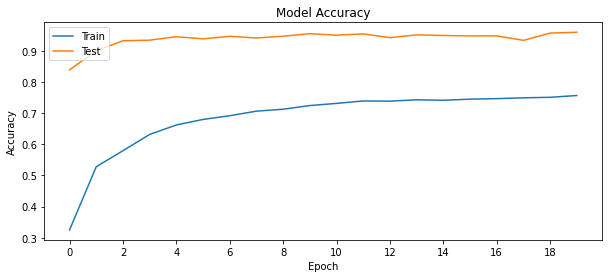

In [33]:
def plot_hist(hist):
    # History for accuracy
    plt.subplots(figsize=(10, 4))  
    plt.plot(hist.history['accuracy'])  
    plt.plot(hist.history['val_accuracy'])  
    plt.title('Model Accuracy')  
    plt.ylabel('Accuracy')  
    plt.xlabel('Epoch')  
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.xticks(list(range(0, 20, 2)))
    plt.show()

plot_hist(hist)

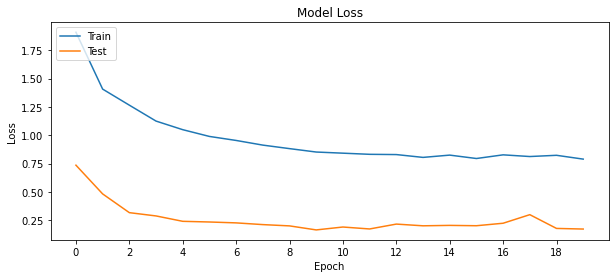

In [34]:
def plot_loss_hist(hist):
    # History for accuracy
    plt.subplots(figsize=(10, 4))  
    plt.plot(hist.history['loss'])  
    plt.plot(hist.history['val_loss'])  
    plt.title('Model Loss')  
    plt.ylabel('Loss')  
    plt.xlabel('Epoch')  
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.xticks(list(range(0, 20, 2)))
    plt.show()

plot_loss_hist(hist)

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

def plot_conf_mat(true_label, pred, title):
    fig, ax = plt.subplots(figsize=(10, 10))
    cm = confusion_matrix(true_label, pred, labels=list(range(cls_size)), normalize="true")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(map(str, range(cls_size))))
    disp = disp.plot(cmap=plt.cm.Blues, ax=ax)
    plt.title(title)
    plt.show()

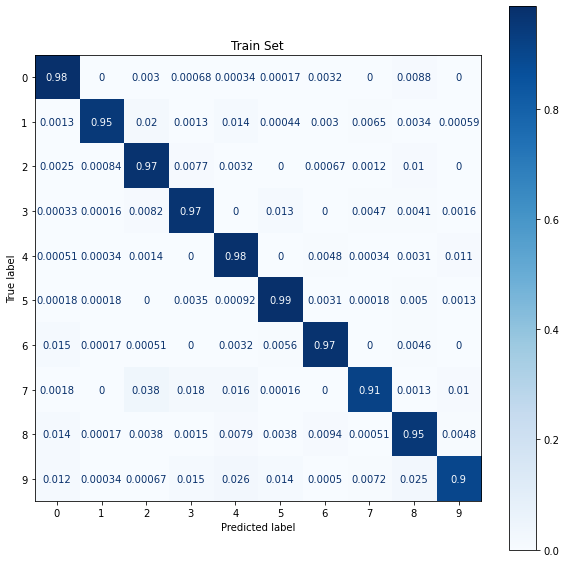

In [44]:
plot_conf_mat(true_train_labels, pred_train_labels, "Train Set")

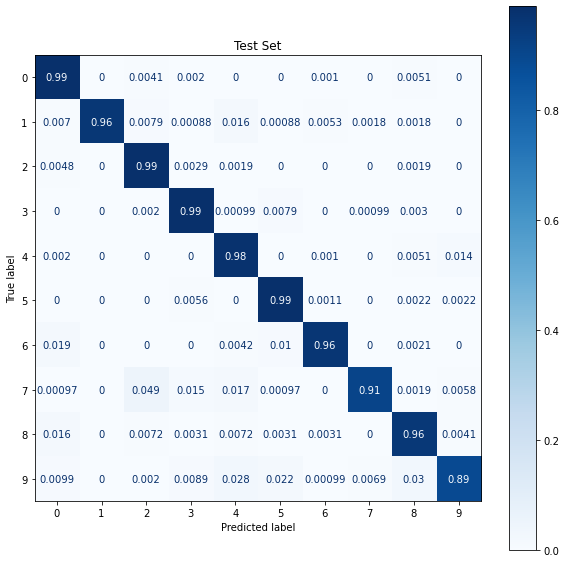

In [45]:
plot_conf_mat(true_test_labels, pred_test_labels, "Test Set")

In [47]:
from sklearn.metrics import accuracy_score

accuracy_score(true_train_labels, pred_train_labels), accuracy_score(true_test_labels, pred_test_labels)

(0.9574, 0.9604)